[*********************100%%**********************]  1 of 1 completed

Standard Deviations:
           1st Std Deviation  2nd Std Deviation  3rd Std Deviation
Frequency                                                         
Daily               1.274546           2.549093           3.823639
Weekly              3.732858           7.465716          11.198574
Monthly             7.457483          14.914966          22.372449

  Frequency  1st Std Deviation (-)  1st Std Deviation (+)  \
0     Daily             136.545461             139.094554   
1    Weekly             134.087149             141.552865   
2   Monthly             130.362524             145.277490   

   2nd Std Deviation (-)  2nd Std Deviation (+)  3rd Std Deviation (-)  \
0             135.270915             140.369100             133.996368   
1             130.354292             145.285723             126.621434   
2             122.905041             152.734973             115.447558   

   3rd Std Deviation (+)  
0             141.643646  
1             149.018581  
2             160.19

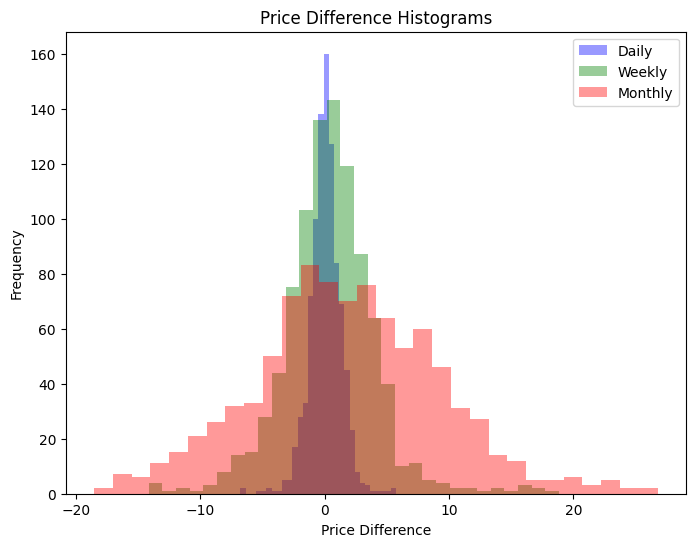

In [1]:
import yfinance as yf
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the date range
    
start = dt.datetime(2020, 11, 4)
end = dt.datetime.today()

# Ticker symbol
ticker_symbol = 'ORCL'

# Fetch historical data
stock_data = yf.download(ticker_symbol, start, end)

# Calculate the daily Price Difference
stock_data['Daily_Price_Difference'] = stock_data['Close'] - stock_data['Open']

# Calculate the weekly Price Difference
stock_data['Weekly_Price_Difference'] = stock_data['Close'] - stock_data['Open'].shift(4)

# Calculate the monthly Price Difference
stock_data['Monthly_Price_Difference'] = stock_data['Close'] - stock_data['Open'].shift(19)

# Calculate the standard deviations
daily_std = np.std(stock_data['Daily_Price_Difference'])
weekly_std = np.std(stock_data['Weekly_Price_Difference'].dropna())
monthly_std = np.std(stock_data['Monthly_Price_Difference'].dropna())

# Calculate the 1st, 2nd, and 3rd standard deviations
first_std_daily = daily_std
second_std_daily = 2 * daily_std
third_std_daily = 3 * daily_std
first_std_weekly = weekly_std
second_std_weekly = 2 * weekly_std
third_std_weekly = 3 * weekly_std
first_std_monthly = monthly_std
second_std_monthly = 2 * monthly_std
third_std_monthly = 3 * monthly_std

# Calculate the current stock price
current_stock_price = stock_data['Close'].iloc[-1]

# Create a table for standard deviations
std_data = {
    'Frequency': ['Daily', 'Weekly', 'Monthly'],
    '1st Std Deviation': [first_std_daily, first_std_weekly, first_std_monthly],
    '2nd Std Deviation': [second_std_daily, second_std_weekly, second_std_monthly],
    '3rd Std Deviation': [third_std_daily, third_std_weekly, third_std_monthly],
}

std_table = pd.DataFrame(std_data)
std_table = std_table.set_index('Frequency')

# Print the standard deviation table
print("Standard Deviations:")
print(std_table)
print()

# Create a well-formatted data table
prices_data = {
    'Frequency': ['Daily', 'Weekly', 'Monthly'],
    '1st Std Deviation (-)': [current_stock_price - first_std_daily, current_stock_price - first_std_weekly, current_stock_price - first_std_monthly],
    '1st Std Deviation (+)': [current_stock_price + first_std_daily, current_stock_price + first_std_weekly, current_stock_price + first_std_monthly],
    '2nd Std Deviation (-)': [current_stock_price - second_std_daily, current_stock_price - second_std_weekly, current_stock_price - second_std_monthly],
    '2nd Std Deviation (+)': [current_stock_price + second_std_daily, current_stock_price + second_std_weekly, current_stock_price + second_std_monthly],
    '3rd Std Deviation (-)': [current_stock_price - third_std_daily, current_stock_price - third_std_weekly, current_stock_price - third_std_monthly],
    '3rd Std Deviation (+)': [current_stock_price + third_std_daily, current_stock_price + third_std_weekly, current_stock_price + third_std_monthly],
}

prices_table = pd.DataFrame(prices_data)
print(prices_table)

# Plot histograms on the same axes
plt.figure(figsize=(8, 6))
plt.hist(stock_data['Daily_Price_Difference'], bins=30, color='blue', alpha=0.4, label='Daily')
plt.hist(stock_data['Weekly_Price_Difference'].dropna(), bins=30, color='green', alpha=0.4, label='Weekly')
plt.hist(stock_data['Monthly_Price_Difference'].dropna(), bins=30, color='red', alpha=0.4, label='Monthly')

plt.title('Price Difference Histograms')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


In [31]:
def stock_price_std(start: str,end: str, ticker: str):
    start = dt.datetime.strptime(start, '%Y-%m-%d') 
    end = dt.datetime.strptime(end, '%Y-%m-%d')
    
    stock_data = yf.download(ticker, start, end)

    stock_data['Daily_Price_Difference'] = stock_data['Close'] - stock_data['Open']

    # Calculate the weekly Price Difference
    stock_data['Weekly_Price_Difference'] = stock_data['Close'] - stock_data['Open'].shift(4)

    # Calculate the monthly Price Difference
    stock_data['Monthly_Price_Difference'] = stock_data['Close'] - stock_data['Open'].shift(19)

    # Calculate the standard deviations
    daily_std = np.std(stock_data['Daily_Price_Difference'])
    weekly_std = np.std(stock_data['Weekly_Price_Difference'].dropna())
    monthly_std = np.std(stock_data['Monthly_Price_Difference'].dropna())

    # Calculate the 1st, 2nd, and 3rd standard deviations
    first_std_daily = daily_std
    second_std_daily = 2 * daily_std
    third_std_daily = 3 * daily_std
    first_std_weekly = weekly_std
    second_std_weekly = 2 * weekly_std
    third_std_weekly = 3 * weekly_std
    first_std_monthly = monthly_std
    second_std_monthly = 2 * monthly_std
    third_std_monthly = 3 * monthly_std

    # Calculate the current stock price
    current_stock_price = stock_data['Close'].iloc[-1]

    # Create a table for standard deviations
    std_data = {
        'Frequency': ['Daily', 'Weekly', 'Monthly'],
        '1st Std Deviation': [first_std_daily, first_std_weekly, first_std_monthly],
        '2nd Std Deviation': [second_std_daily, second_std_weekly, second_std_monthly],
        '3rd Std Deviation': [third_std_daily, third_std_weekly, third_std_monthly],
    }

    std_table = pd.DataFrame(std_data)
    std_table = std_table.set_index('Frequency')

    # Print the standard deviation table
    print("Standard Deviations:")
    print(std_table)
    print()

    # Create a well-formatted data table
    prices_data = {
        'Frequency': ['Daily', 'Weekly', 'Monthly'],
        '1st Std Deviation (-)': [current_stock_price - first_std_daily, current_stock_price - first_std_weekly, current_stock_price - first_std_monthly],
        '1st Std Deviation (+)': [current_stock_price + first_std_daily, current_stock_price + first_std_weekly, current_stock_price + first_std_monthly],
        '2nd Std Deviation (-)': [current_stock_price - second_std_daily, current_stock_price - second_std_weekly, current_stock_price - second_std_monthly],
        '2nd Std Deviation (+)': [current_stock_price + second_std_daily, current_stock_price + second_std_weekly, current_stock_price + second_std_monthly],
        '3rd Std Deviation (-)': [current_stock_price - third_std_daily, current_stock_price - third_std_weekly, current_stock_price - third_std_monthly],
        '3rd Std Deviation (+)': [current_stock_price + third_std_daily, current_stock_price + third_std_weekly, current_stock_price + third_std_monthly],
    }

    prices_table = pd.DataFrame(prices_data)
    print(prices_table)

    # Plot histograms on the same axes
    plt.figure(figsize=(8, 6))
    plt.hist(stock_data['Daily_Price_Difference'], bins=30, color='blue', alpha=0.4, label='Daily')
    plt.hist(stock_data['Weekly_Price_Difference'].dropna(), bins=30, color='green', alpha=0.4, label='Weekly')
    plt.hist(stock_data['Monthly_Price_Difference'].dropna(), bins=30, color='red', alpha=0.4, label='Monthly')

    plt.title(f'{ticker} Price Difference Histograms')
    plt.xlabel('Price Difference')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

[*********************100%%**********************]  1 of 1 completed
Standard Deviations:
           1st Std Deviation  2nd Std Deviation  3rd Std Deviation
Frequency                                                         
Daily               2.169366           4.338731           6.508097
Weekly              5.572814          11.145628          16.718442
Monthly            11.043475          22.086949          33.130424

  Frequency  1st Std Deviation (-)  1st Std Deviation (+)  \
0     Daily             166.650642             170.989373   
1    Weekly             163.247193             174.392821   
2   Monthly             157.776533             179.863482   

   2nd Std Deviation (-)  2nd Std Deviation (+)  3rd Std Deviation (-)  \
0             164.481276             173.158739             162.311910   
1             157.674379             179.965635             152.101565   
2             146.733058             190.906957             135.689583   

   3rd Std Deviation (+)  
0    

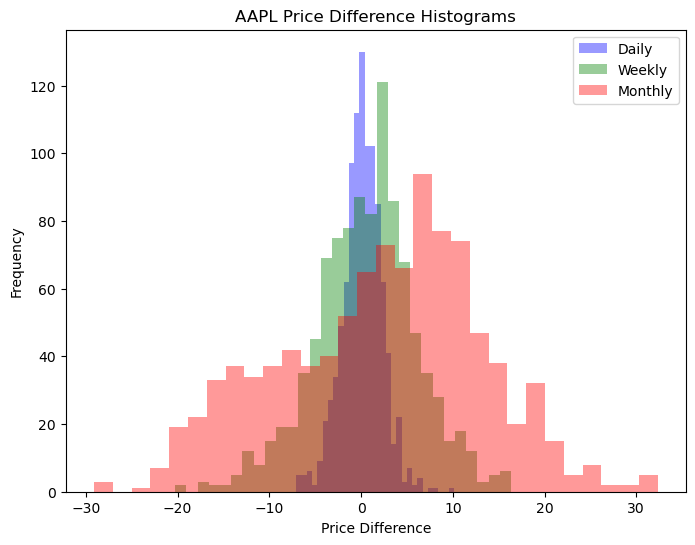

In [32]:
end = '2024-04-05'
start = '2020-04-05'
ticker = 'AAPL'


stock_graph = stock_price_std(start, end, ticker)

'2024-04-05'